In [ ]:
# version 1
# Last_updated_by: Ziyu

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("stackoverflow_full.csv")
missing_data = data.isna().sum()
missing_data

Unnamed: 0         0
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

### Deal with missing values

In [3]:
data['HaveWorkedWith'] = data['HaveWorkedWith'].fillna('')  # Replace NaN with empty string
missing_data = data.isna().sum()
missing_data

Unnamed: 0        0
Age               0
Accessibility     0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCode         0
YearsCodePro      0
Country           0
PreviousSalary    0
HaveWorkedWith    0
ComputerSkills    0
Employed          0
dtype: int64

In [4]:
print(data.head())

   Unnamed: 0  Age Accessibility        EdLevel  Employment Gender  \
0           0  <35            No         Master           1    Man   
1           1  <35            No  Undergraduate           1    Man   
2           2  <35            No         Master           1    Man   
3           3  <35            No  Undergraduate           1    Man   
4           4  >35            No            PhD           0    Man   

  MentalHealth MainBranch  YearsCode  YearsCodePro    Country  PreviousSalary  \
0           No        Dev          7             4     Sweden         51552.0   
1           No        Dev         12             5      Spain         46482.0   
2           No        Dev         15             6    Germany         77290.0   
3           No        Dev          9             6     Canada         46135.0   
4           No     NotDev         40            30  Singapore        160932.0   

                                      HaveWorkedWith  ComputerSkills  Employed  
0          

In [5]:
data.columns = data.columns.str.strip()

In [8]:
data.columns

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed'],
      dtype='object')

In [6]:
# drop the index column
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [7]:
data.shape

(73462, 14)

### correlation

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from data_process import convert_to_categorical

In [10]:
converted_Data = convert_to_categorical(data)

C:\Users\china\AppData\Local\Temp\ipykernel_21156\1059818540.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = converted_Data.corr()


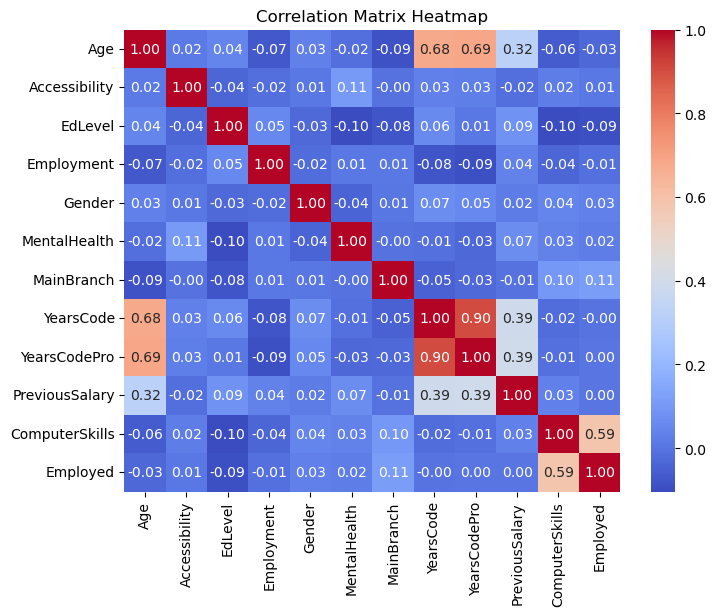

In [11]:
correlation_matrix = converted_Data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Find top 10 computer skills

In [12]:
all_skills = data['HaveWorkedWith'].str.split(';')
print(all_skills)


0                           [C++, Python, Git, PostgreSQL]
1        [Bash/Shell, HTML/CSS, JavaScript, Node.js, SQ...
2           [C, C++, Java, Perl, Ruby, Git, Ruby on Rails]
3        [Bash/Shell, HTML/CSS, JavaScript, PHP, Ruby, ...
4                                            [C++, Python]
                               ...                        
73457    [C#, HTML/CSS, JavaScript, TypeScript, Docker,...
73458    [C#, HTML/CSS, Java, JavaScript, npm, ASP.NET ...
73459    [HTML/CSS, JavaScript, TypeScript, Docker, Exp...
73460    [C#, HTML/CSS, JavaScript, SQL, TypeScript, np...
73461                                     [Python, Docker]
Name: HaveWorkedWith, Length: 73462, dtype: object


In [13]:
from collections import Counter

# list of all skills
flattened_skills = []
for sublist in all_skills:
    if isinstance(sublist, list):  
        for skill in sublist:
            if isinstance(skill, str): 
                cleaned_skill = skill.strip()  
                flattened_skills.append(cleaned_skill) 

# # Alternative way: a list comprehension 
# flattened_skills = [
#     skill.strip() 
#     for sublist in all_skills if isinstance(sublist, list)  # Check if the sublist is actually a list
#     for skill in sublist if isinstance(skill, str)          # Then iterate over each skill in the sublist
# ]

skills_count = Counter(flattened_skills)
top_skills = [skill for skill, count in skills_count.most_common(10)]
print(top_skills)


['JavaScript', 'Docker', 'HTML/CSS', 'SQL', 'Git', 'AWS', 'Python', 'PostgreSQL', 'MySQL', 'TypeScript']


In [14]:
# Getting the top 20 most common skills and their counts
top_20_skills = skills_count.most_common(20)

# Print each skill with its count
for skill, count in top_20_skills:
    print(f"{skill}: {count}")

JavaScript: 49347
Docker: 40224
HTML/CSS: 40207
SQL: 38361
Git: 35911
AWS: 31590
Python: 31159
PostgreSQL: 30102
MySQL: 29490
TypeScript: 27533
Node.js: 26043
React.js: 24695
Java: 22653
Bash/Shell: 21929
C#: 21724
Microsoft SQL Server: 20105
SQLite: 19324
jQuery: 18812
Microsoft Azure: 17963
MongoDB: 17283


In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

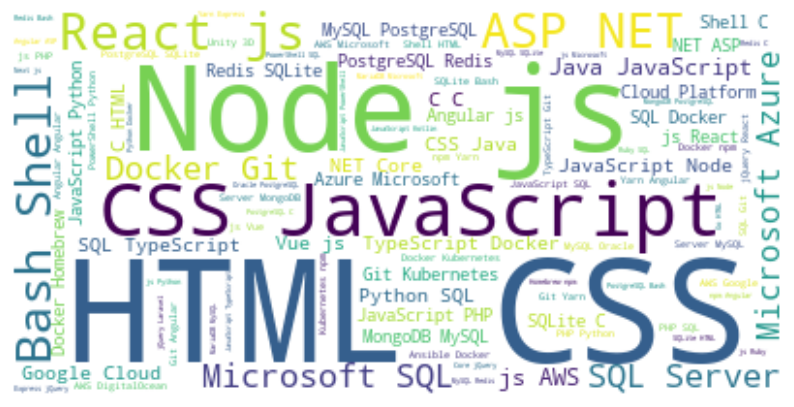

In [36]:
# Generate a word cloud image
skills_text = " ".join(flattened_skills)
wordcloud = WordCloud(background_color="white").generate(skills_text)

# Display the generated image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Update the dataset with ten columns representing the top ten most popular skills where each column has a binary value indicating the presence (1) or absence (0) of a skill:

In [16]:
def create_binary_columns(skill_list, top_skills):
    # Create a binary list representing the presence or absence of each top skill
    return [1 if skill in skill_list else 0 for skill in top_skills]   

In [17]:
binary_columns = all_skills.apply(lambda x: create_binary_columns(x, top_skills))
binary_df = pd.DataFrame(binary_columns.tolist(), columns=top_skills)
final_dataset = pd.concat([data, binary_df], axis=1)
print(final_dataset.head())

   Age Accessibility        EdLevel  Employment Gender MentalHealth  \
0  <35            No         Master           1    Man           No   
1  <35            No  Undergraduate           1    Man           No   
2  <35            No         Master           1    Man           No   
3  <35            No  Undergraduate           1    Man           No   
4  >35            No            PhD           0    Man           No   

  MainBranch  YearsCode  YearsCodePro    Country  ...  JavaScript Docker  \
0        Dev          7             4     Sweden  ...           0      0   
1        Dev         12             5      Spain  ...           1      0   
2        Dev         15             6    Germany  ...           0      0   
3        Dev          9             6     Canada  ...           1      0   
4     NotDev         40            30  Singapore  ...           0      0   

   HTML/CSS  SQL  Git  AWS  Python  PostgreSQL  MySQL  TypeScript  
0         0    0    1    0       1           1  

### Split the final dataset to 3 csv files (train/valid/test):

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# using fixed rate and random_state to ensure reproducibility

train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

train_data, temp_data = train_test_split(final_dataset, test_size = 1 - train_ratio, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=test_ratio / (test_ratio + valid_ratio), random_state=42)

train_data.to_csv("train_set.csv", index=False)
valid_data.to_csv("valid_set.csv", index=False)
test_data.to_csv("test_set.csv", index=False)

print("Split datasets saved successfully.")
# save three splitted dataset for future use

Split datasets saved successfully.


In [26]:
data.shape

(73462, 14)

In [27]:
final_dataset.shape

(73462, 25)

In [20]:
final_dataset.to_csv("employment_dataset.csv", index=False)
# save pre-processed dataset for future use